In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Kernel Calculates:
$$w(x,x_{0}) = e^{\frac{-(x_{0}-x)^{2}}{2k^{2}}}$$

In [16]:
def kernel(point,xmat, k):
   m,n = np.shape(xmat)
   weights = np.mat(np.eye((m))) 
   for j in range(m):
      diff = point - X[j]
      weights[j,j] = np.exp(diff*diff.T/(-2.0*k**2))
   return weights

Local Weight calculates:
$${\hat{\beta}}(x_{0}) = (X^{T}WX)^{-1}X^{T}WY^{T}$$

In [17]:
def localWeight(point,xmat,ymat,k):
    wei = kernel(point,xmat,k)
    W = (X.T*(wei*X)).I*(X.T*(wei*ymat.T))
    return W

Local Weight Regression Returns:
$$x_{0}{\beta}$$

In [18]:
def localWeightRegression(xmat,ymat,k):
    m,n = np.shape(xmat)
    ypred = np.zeros(m)
    for i in range(m):
        ypred[i] = xmat[i]*localWeight(xmat[i],xmat,ymat,k)
    return ypred

In [19]:
# Read Data from csv and separate the cols as array.
data = pd.read_csv('tips.csv')
bill = np.array(data.total_bill)
tip = np.array(data.tip)

# Convert to matrix/ 2d array
m_bill = np.mat(bill)
m_tip = np.mat(tip)
m_one = np.mat(np.ones(len(bill)))

# Transpose and create a Hstack
X = np.hstack((m_one.T, m_bill.T))

# Local weighted Regress
ypred = localWeightRegression(X, m_tip, 10)

# Sort X by col-2, save index sequence in sortindex and now save sorted X in xsort.
SortIndex = X[:, 1].argsort(0)
xsort = X[SortIndex][:, 0]

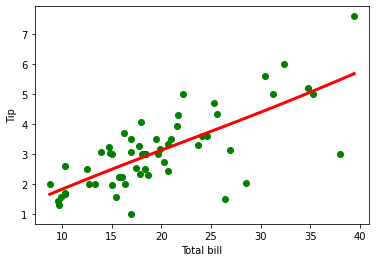

In [20]:
plt.scatter(bill, tip, color='green')
plt.plot(xsort[:, 1], ypred[SortIndex], color='red', linewidth=3)
plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.show()